Medical Insurance 데이터를 이용해서 보험료 예측하기 - 회귀

# 데이터 분석

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
#!pip install IPython 

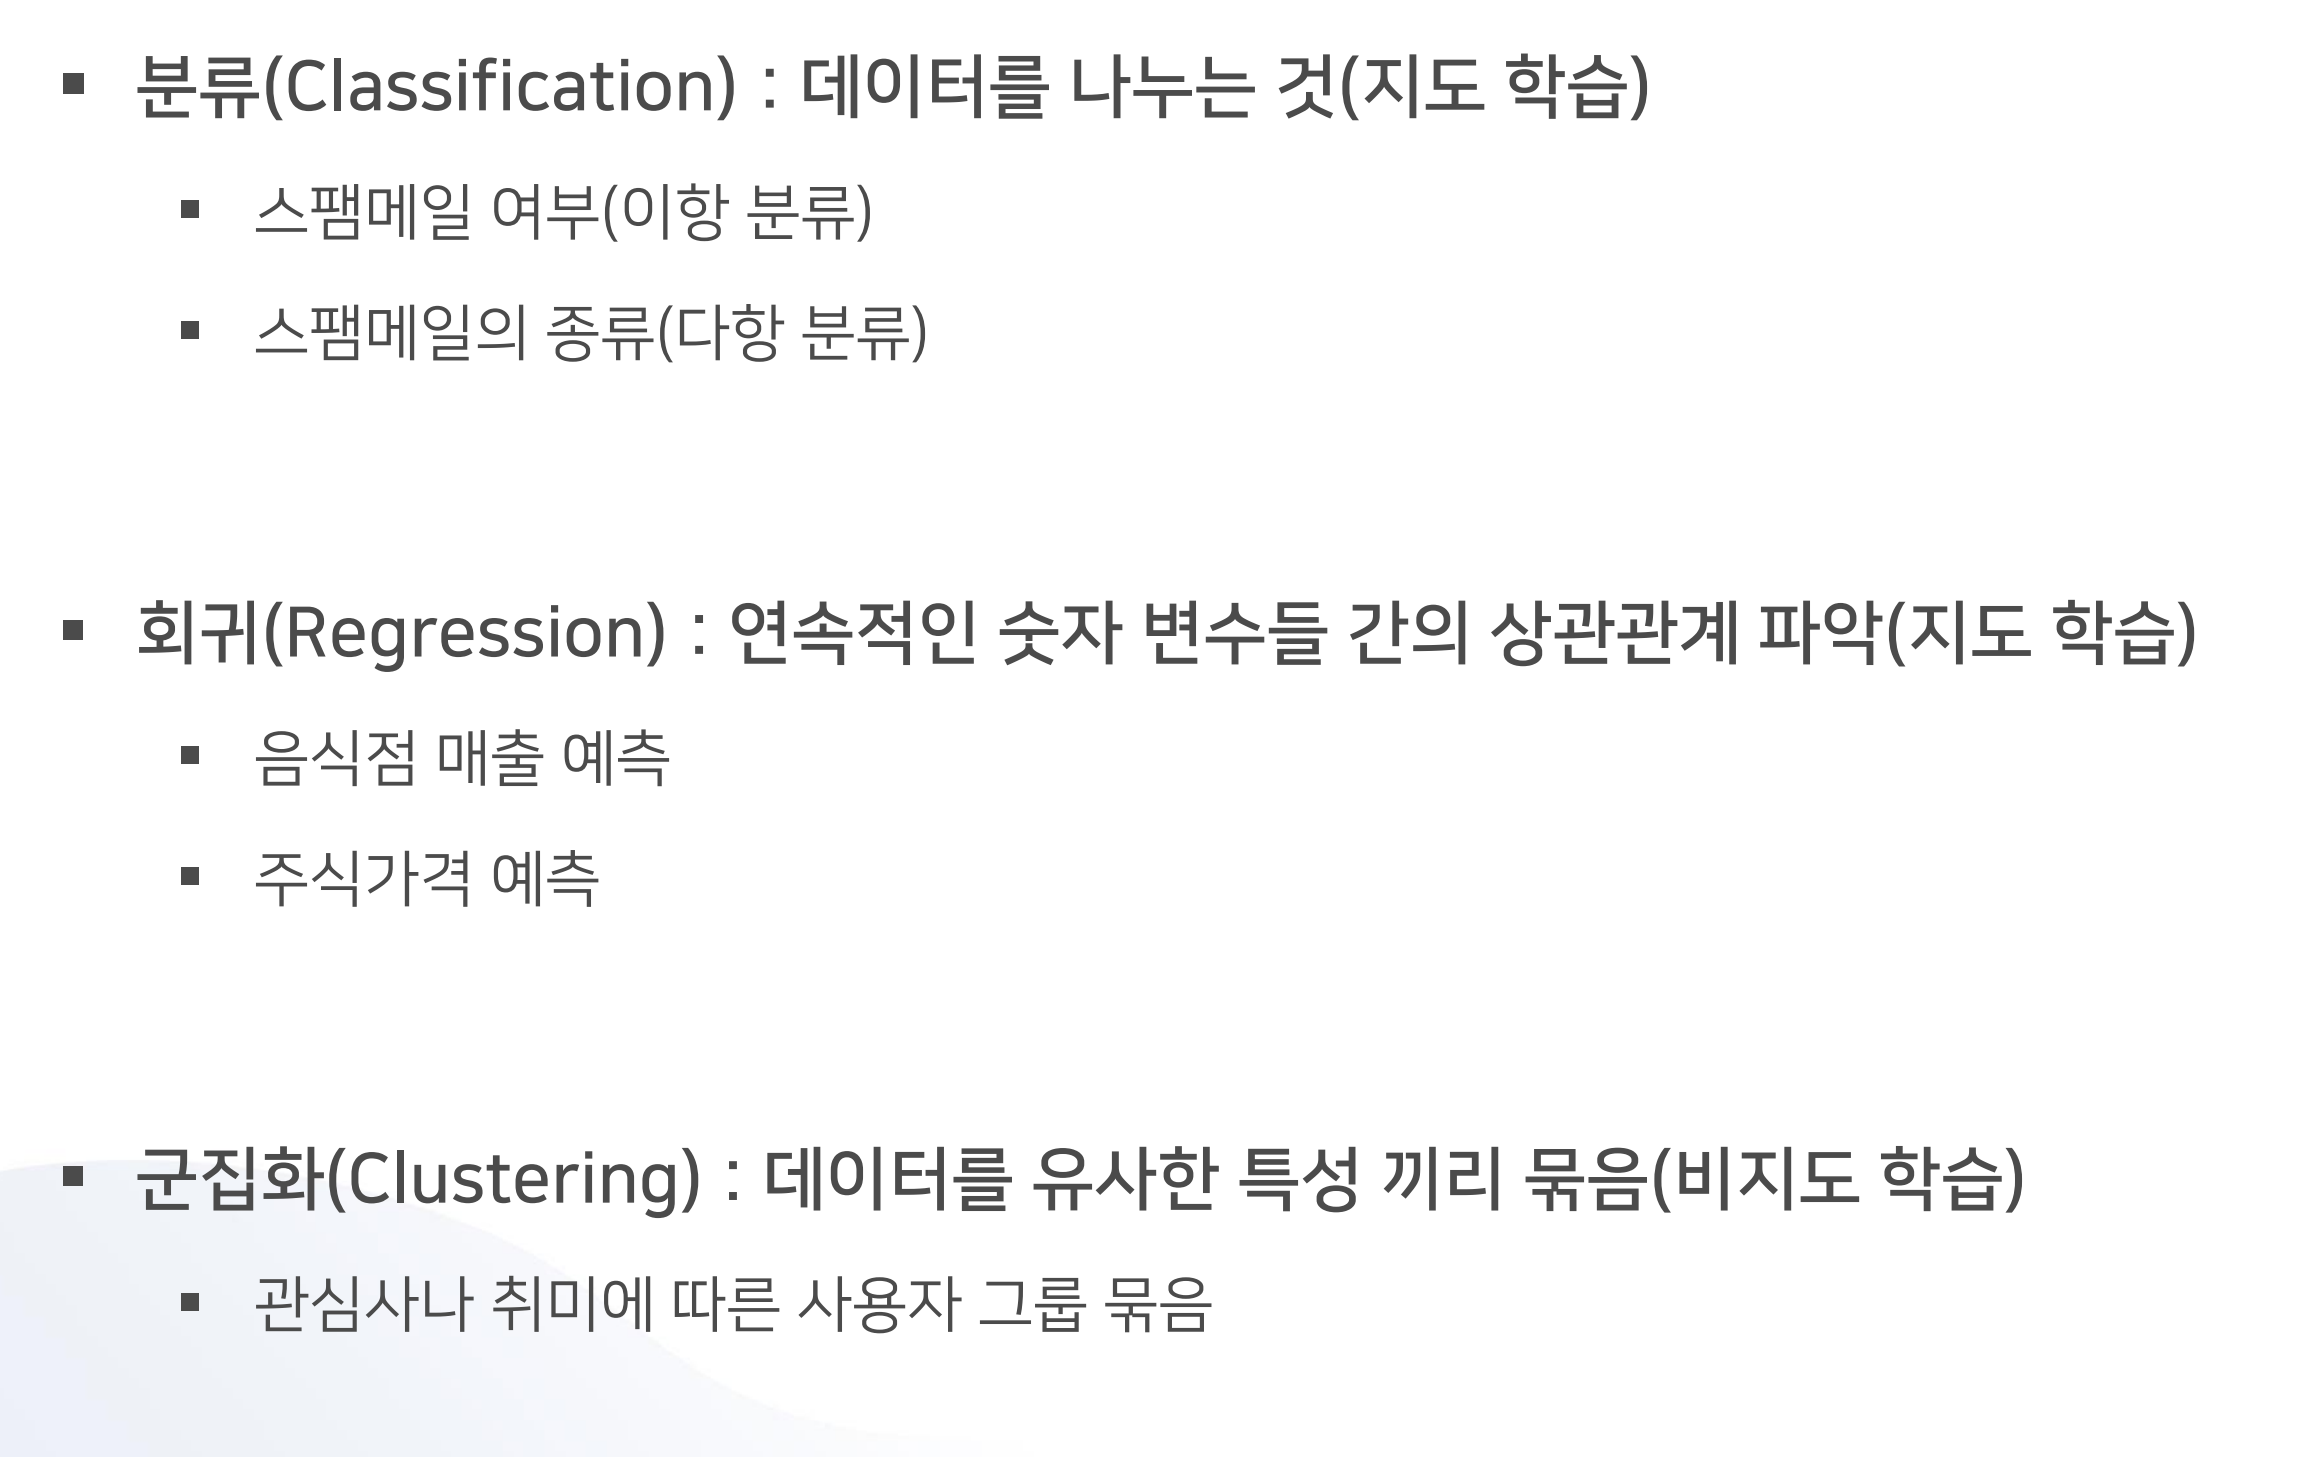

In [58]:
Image('C:\\Users\\user\\Desktop\\python\\4주\\17.Machine\\회귀.PNG') 

In [2]:
# read_csv() 가로 안에 있는 csv 읽어오다
data = pd.read_csv('insurance.csv')

In [3]:
# data 확인
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


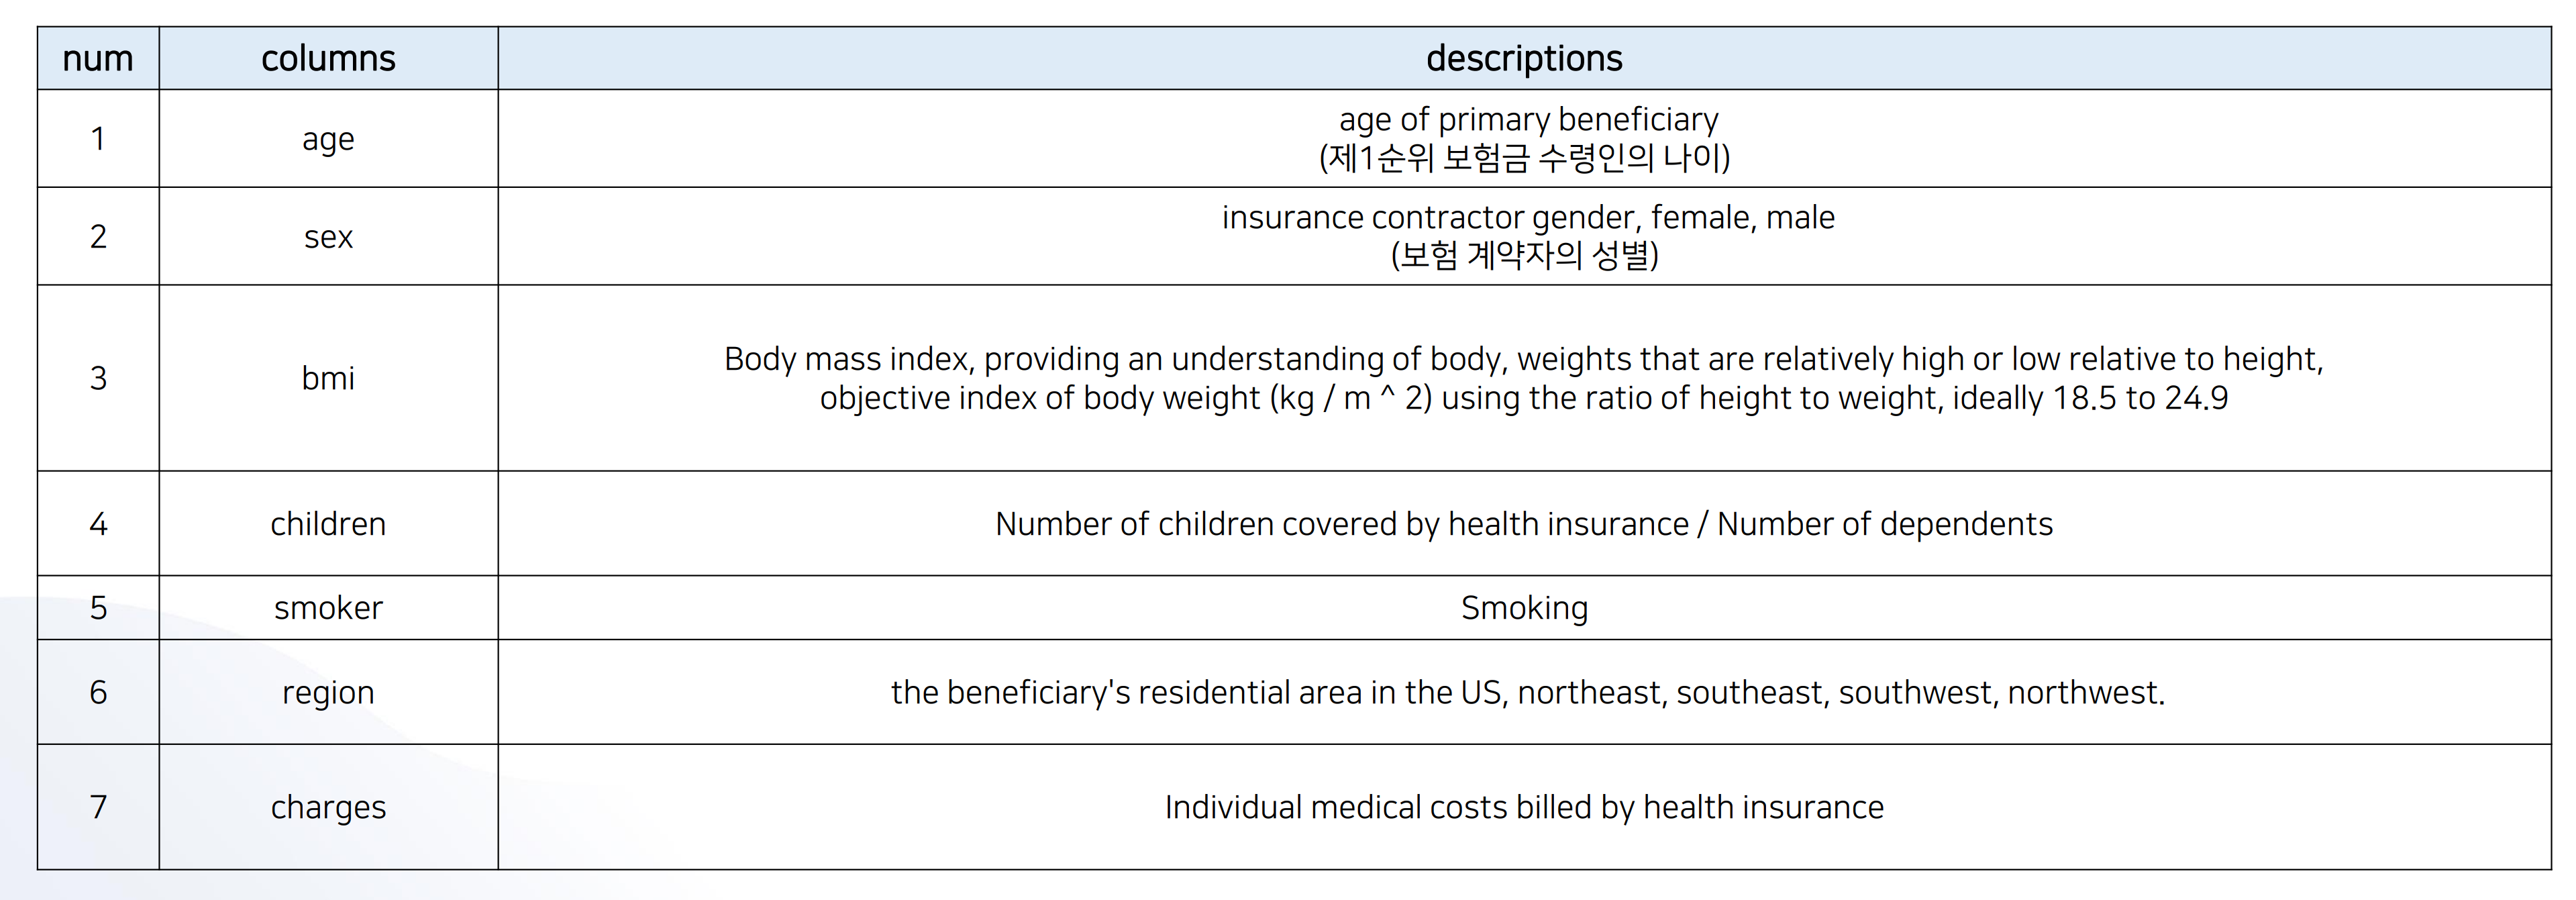

In [4]:
Image('C:\\Users\\user\\Desktop\\python\\4주\\17.Machine\\photo.PNG') 

In [5]:
# nall 값 있는지 확인
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#data- index 1338, type float64(2), int64(2), object(3)\
#- columns 7  확인 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#duplicated 는 DataFrame에 있는 행들 중 중복된 값을 가진 행이 뭔지\ 
# True, False의 형태로 알려줍니다.
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [8]:
# duplicated 중복값을 데이터 프레임으로 확인 
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
# 데이터 charges 에서 중복값 다른것들도 확인 
data[data['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# 데이터에서 중복값들은 drop (제거) 후 저장 
# why? 왜 제거 저장해야하지?
data = data.drop_duplicates()

In [11]:
# 중복된것들이 없음을 확인 
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [12]:
data[data['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [13]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
# dtype 이 object인 columns 를 int로 바꿔줌 
# ?!children 은 자녀의 수 평균을 내면 무의미하기에 같이 해줌?!
obj_col = ['sex','children','smoker','region']

In [15]:
# 한큐의 .unique() 확인하는 for문
for col in obj_col:
    print(col, data[col].unique())

sex ['female' 'male']
children [0 1 3 2 5 4]
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [16]:
# 한큐의 .value_counts() 확인하는 for문
for col in obj_col :
    print(col,'\n' , data[col].value_counts())
    print('----')

sex 
 male      675
female    662
Name: sex, dtype: int64
----
children 
 0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
----
smoker 
 no     1063
yes     274
Name: smoker, dtype: int64
----
region 
 southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
----


In [17]:
# 흡연한사람의 보험료 중앙값 확인 
data.groupby('smoker')['charges'].median()

smoker
no      7345.72660
yes    34456.34845
Name: charges, dtype: float64

In [18]:
# 지역마다 보험료 중앙값 확인
data.groupby('region')['charges'].median()

region
northeast    10057.652025
northwest     8976.977250
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

In [19]:
#quantile 해당 행/열의 분위수의 해당하는 값을 반환하는 메서드입니다.
#0.25에 해당하는 행/열 분위수의 해당하는 값을 반환 
data['charges'].quantile(0.25)

4746.344

In [20]:
q1 = data['charges'].quantile(0.25)

In [21]:
data['charges'].quantile(0.75)

16657.71745

In [22]:
q3 = data['charges'].quantile(0.75)

In [23]:
outlier = q3 +(q3-q1)*1.5

In [24]:
outlier

34524.777625

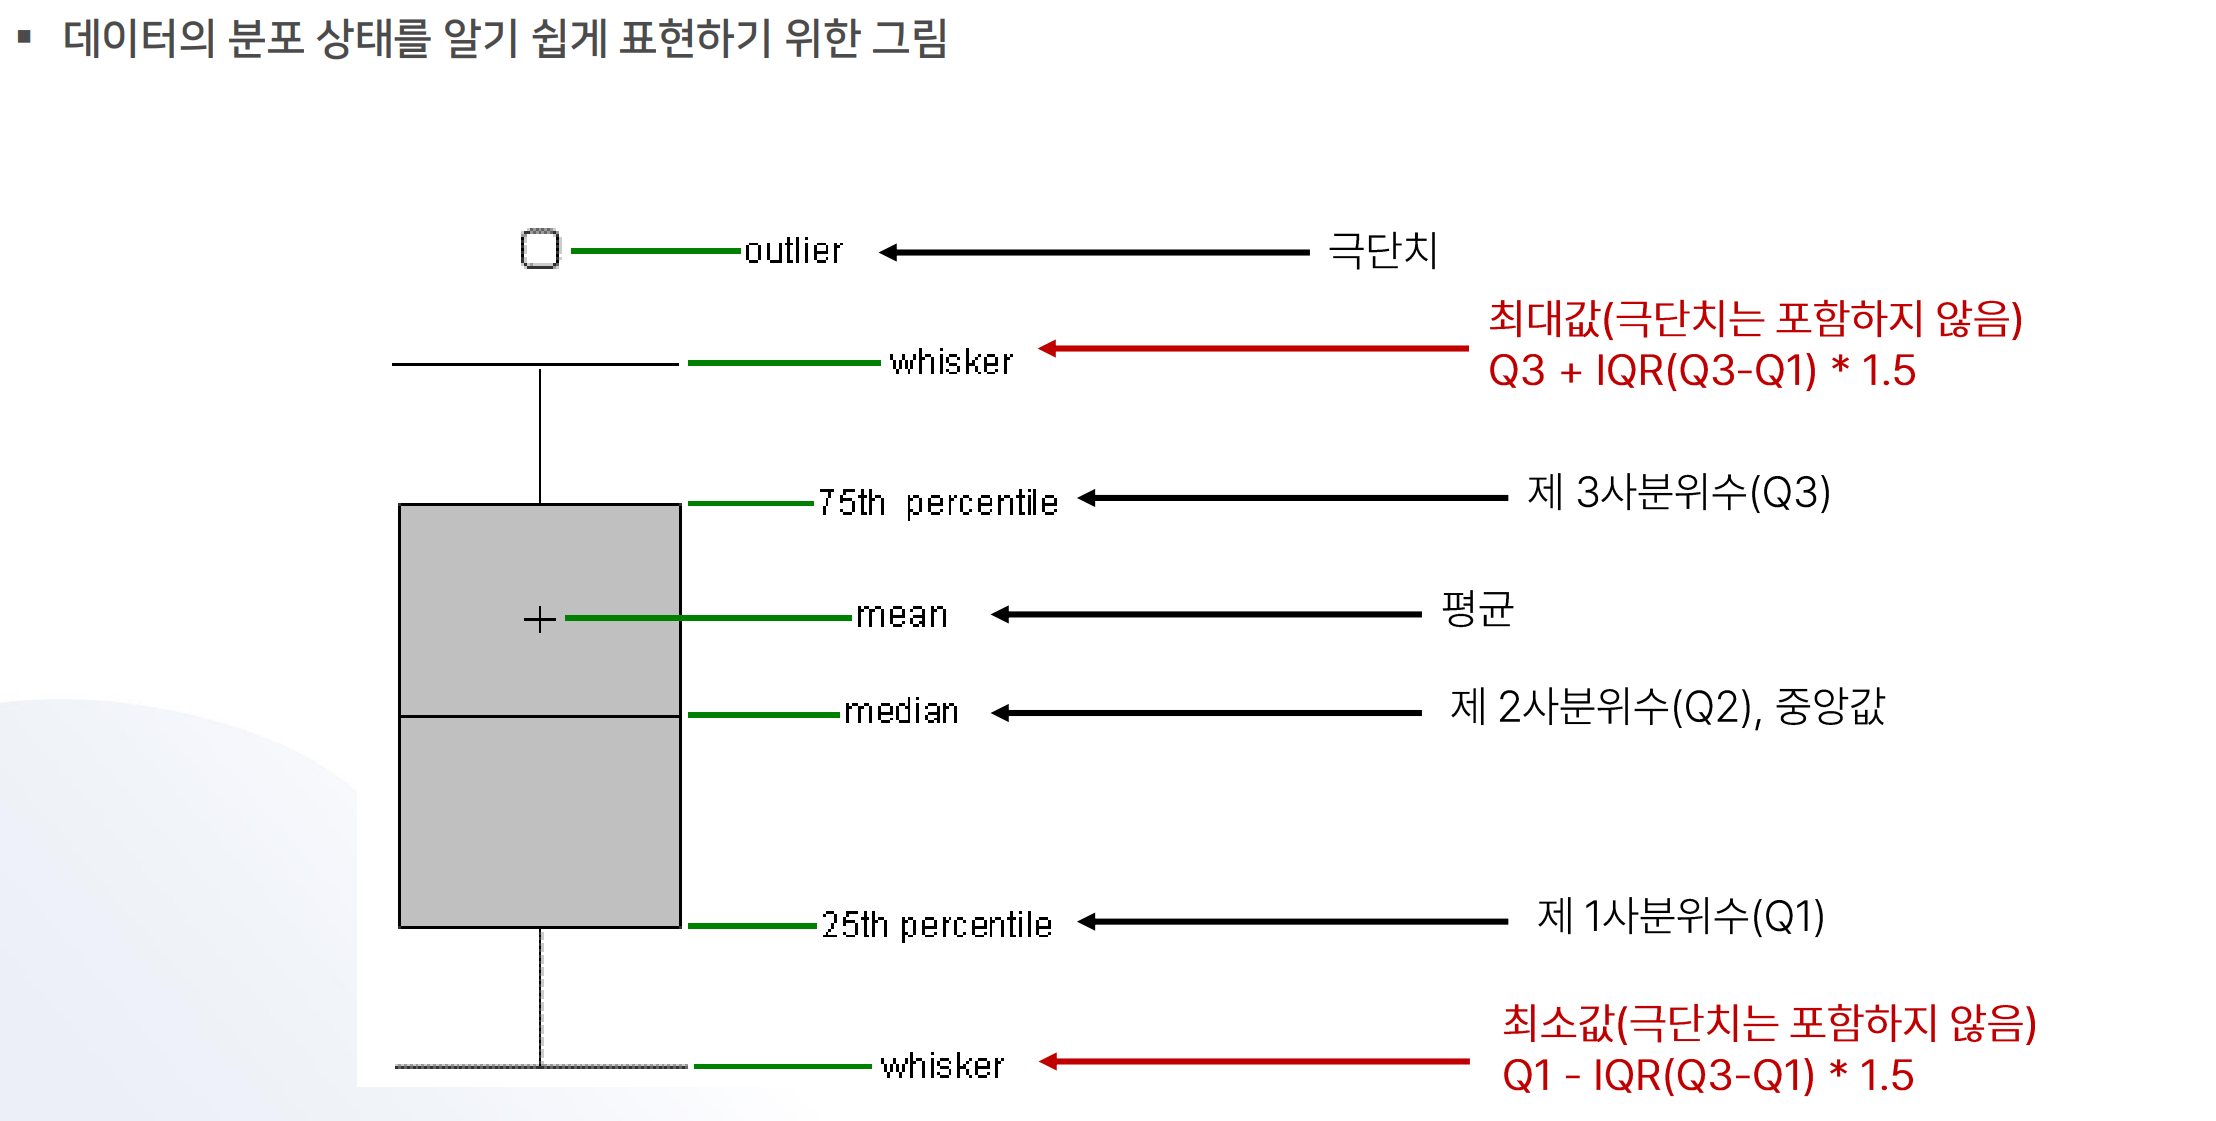

In [25]:
Image('C:\\Users\\user\\Desktop\\python\\4주\\17.Machine\\whisker.PNG') 

In [26]:
# 극단치를 보다 큰 애들을 불러옴
data[data['charges'] > outlier]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [27]:
# 반대로 극단치 보다 작거나 같은애들을 불러옴 
data[data['charges'] <= outlier]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# 한방에 object 애들 int 화 
col_list = ['sex','smoker','region']
for col in col_list :
    label = LabelEncoder() # 모델 불러온거
    label.fit(data[col].unique()) # unique에 맞게 label을 fit 하다 
    data[col] = label.transform(data[col])
    # data[col]각각에 맞게 값이 들어갈게끔 transform

C:\Users\user\AppData\Local\Temp\ipykernel_14680\3740638484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label.transform(data[col])


In [30]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# 학습시키기 1

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 회귀
from sklearn.metrics import mean_absolute_error
import pandas as pd

In [32]:
x = data.drop('charges',axis=1) #보험료 열 제외 학습시킬데이터 
y = data['charges']

In [38]:
# 학습시킬 문제 ,시험문제 , 학습시킬 문제에 대한 정답 , 시험문제에 대한 정답 
x_train, x_test, y_train, y_test = \ 
train_test_split(x,y, test_size=0.2,random_state=0)
# test_size 8:2 train:test 확인 

In [39]:
#모델 불러오기 
model = LinearRegression()

In [40]:
# 학습 
model.fit(x_train, y_train)

LinearRegression()

In [41]:
#모델이 훈련되면 predict()입력 값을 기반으로 출력 값을 예측하는 데 사용
pre_train = model.predict(x_train)
pre_test = model.predict(x_test)

In [42]:
# score 점수 / 결과 
model.score(x_test, y_test)

0.7526726290709554

In [43]:
model.score(x_train, y_train)

0.7487799749798774

# 학습시키기 2
- 모델을 바꾸기

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # 회귀
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [45]:
data = pd.read_csv('insurance.csv')

In [46]:
#문자열->숫자로 바꿔 줌
col_list = ['sex', 'smoker', 'region']
for col in col_list :
    label = LabelEncoder()
    label.fit(data[col].unique())
    data[col] = label.transform(data[col])

In [47]:
model = LinearRegression()

In [48]:
from sklearn.preprocessing import PolynomialFeatures
# train 데이터를 PolynomialFeatures 를 이용하여 변환

In [49]:
pol = PolynomialFeatures(degree=2)# 차원은 2로 설정

In [50]:
x = data.drop('charges',axis=1) #보험료 열 제외 학습시킬데이터 
y = data['charges']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [52]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [53]:
x_pol = pol.fit_transform(x)

In [54]:
x_pol

array([[ 1., 19.,  0., ...,  1.,  3.,  9.],
       [ 1., 18.,  1., ...,  0.,  0.,  4.],
       [ 1., 28.,  1., ...,  0.,  0.,  4.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  4.],
       [ 1., 21.,  0., ...,  0.,  0.,  9.],
       [ 1., 61.,  0., ...,  1.,  1.,  1.]])

In [55]:
model.fit(x_train, y_train)

LinearRegression()

In [56]:
model.score(x_train, y_train)

0.7368306228430945

In [57]:
model.score(x_test, y_test)

0.7998747145449959